In [98]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [99]:
img_height, img_width = 224, 224  # Set according to your needs
batch_size = 32
base_dir = 'images' 

Found 48 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


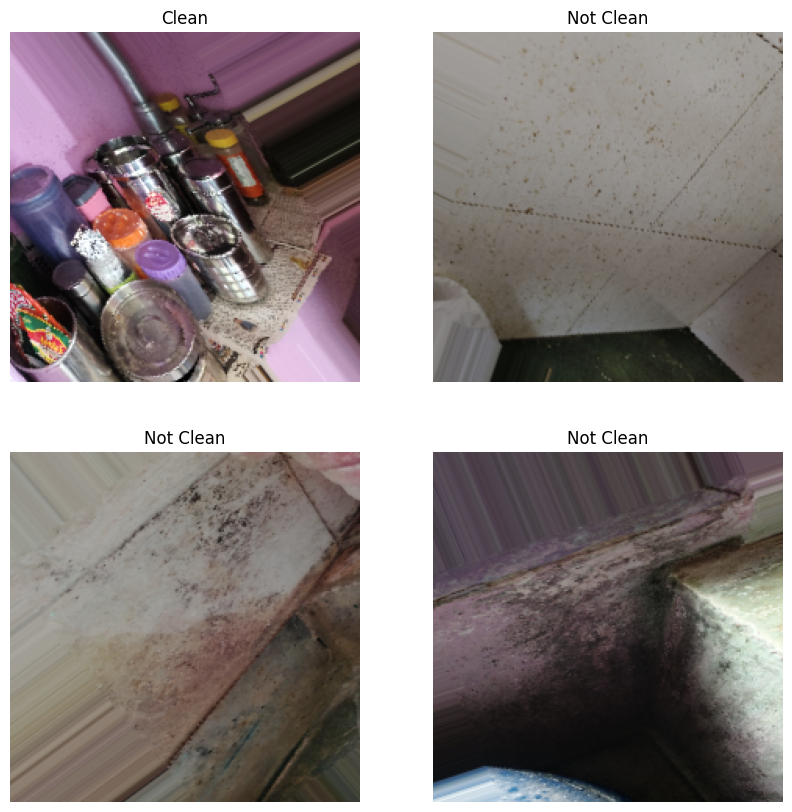

In [100]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

# Function to perform random cropping
def random_crop(image, target_height, target_width):
    height, width, _ = image.shape
    top = np.random.randint(0, height - target_height + 1)
    left = np.random.randint(0, width - target_width + 1)
    cropped_image = image[top:top + target_height, left:left + target_width]
    return cropped_image

# Custom function for contrast adjustment
def adjust_contrast(image, factor=1.5):
    image = image.astype(np.float32)
    img = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return img.astype(np.float32)

# Contrast preprocessing function
def contrast_preprocessing_function(x):
    factor = np.random.uniform(0.8, 1.2)
    return adjust_contrast(x, factor)

# Combined preprocessing function
def combined_preprocessing_function(x):
    x = random_crop(x, 224, 224)  # Crop the image first
    x = contrast_preprocessing_function(x)  # Then adjust contrast
    return x

# Define your ImageDataGenerator with combined preprocessing
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1.0 / 255.0,
    validation_split=0.2,
    preprocessing_function=combined_preprocessing_function  # Use the combined function here
)

# Create your training and validation generators
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),  # Final image size
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),  # Final image size
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='validation'
)

# Function to display samples
def display_samples(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])
        label = 'Clean' if labels[i] == 0 else 'Not Clean'
        plt.title(label)
        plt.axis('off')
    plt.show()

# Display samples with random cropping and contrast adjustment
display_samples(train_generator)

In [101]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the MobileNetV2 model
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

# Unfreeze the top layers (you can adjust how many layers to unfreeze)
for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers
    layer.trainable = True

# Create a new model and add the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=10)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.4583 - loss: 1.6276 - val_accuracy: 0.7273 - val_loss: 0.9166
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7396 - loss: 0.6054 - val_accuracy: 0.6364 - val_loss: 1.7527
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.7014 - loss: 1.1512 - val_accuracy: 0.8182 - val_loss: 0.9756
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.8681 - loss: 0.3128 - val_accuracy: 0.6364 - val_loss: 1.5601
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7917 - loss: 0.3724 - val_accuracy: 0.7273 - val_loss: 1.7062
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.9722 - loss: 0.0992 - val_accuracy: 0.6364 - val_loss: 1.9548
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.9618 - loss: 0.0756 - val_accuracy: 0.6364 - val_loss: 1.7102
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9479 - loss: 0.0916 - val_accuracy: 0.7273 - val_loss: 1.8558
Epoch 9/10
2/2 

In [110]:
# model.save('0.93_accuracy.h5')

In [115]:
accuracy, loss = model.evaluate(validation_generator)
print(f"Val_accuracy: {accuracy:.4f}, Val_Loss: {loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step - accuracy: 0.8182 - loss: 1.8861
Val_accuracy: 1.8861, Val_Loss: 0.8182


In [103]:
from tensorflow.keras.models import load_model
img_path = r'images/clean/13.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0)

In [104]:
predictions = model.predict(img_array)
predicted = 'Clean' if predictions[0][0] < 0.5 else 'Not Clean'
print("Predicted Class", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
Predicted Class Clean


Found 59 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


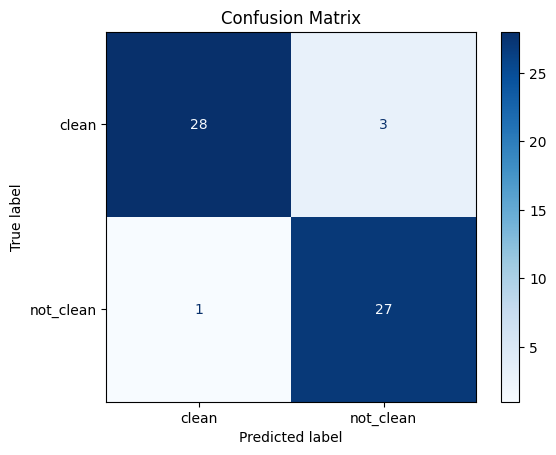

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Prepare the Test Dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    'images',
    target_size=(img_height, img_width),  # Resize images
    batch_size=32,
    class_mode='binary',  # Use 'categorical' for multi-class
    shuffle=False  # Important for confusion matrix
)

# Step 2: Make Predictions on the Test Dataset
y_true = test_generator.classes  # True labels
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred = np.round(y_pred_probs).astype(int)  # Convert probabilities to class labels

# Step 3: Generate and Visualize the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Found 59 images belonging to 2 classes.


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Calculated Accuracy: 0.93


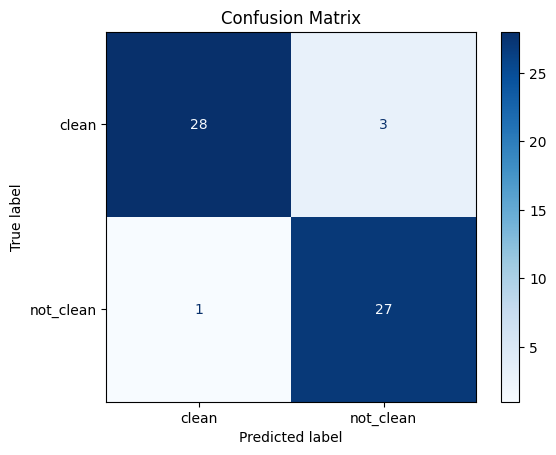

In [106]:
# Step 1: Prepare the Test Dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    'images',
    target_size=(img_height, img_width),  # Resize images
    batch_size=32,
    class_mode='binary',  # Use 'categorical' for multi-class
    shuffle=False  # Important for confusion matrix
)

# Step 2: Make Predictions on the Test Dataset
y_true = test_generator.classes  # True labels
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred = np.round(y_pred_probs).astype(int)  # Convert probabilities to class labels

# Step 3: Generate and Visualize the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Calculate Accuracy
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Calculated Accuracy: {accuracy:.2f}')

# Step 5: Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [111]:
my_model = load_model('0.93_accuracy.h5')

Found 59 images belonging to 2 classes.


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Calculated Accuracy: 0.93


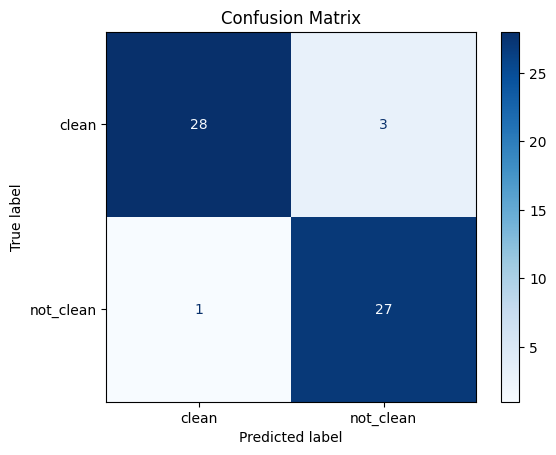

In [112]:
# Step 1: Prepare the Test Dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    'images',
    target_size=(img_height, img_width),  # Resize images
    batch_size=32,
    class_mode='binary',  # Use 'categorical' for multi-class
    shuffle=False  # Important for confusion matrix
)

# Step 2: Make Predictions on the Test Dataset
y_true = test_generator.classes  # True labels
y_pred_probs = my_model.predict(test_generator)  # Predicted probabilities
y_pred = np.round(y_pred_probs).astype(int)  # Convert probabilities to class labels

# Step 3: Generate and Visualize the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Calculate Accuracy
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Calculated Accuracy: {accuracy:.2f}')

# Step 5: Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [116]:
accuracy, loss = my_model.evaluate(validation_generator)
print(f"Val_accuracy: {accuracy:.4f}, Val_Loss: {loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: 2.8615
Val_accuracy: 2.8615, Val_Loss: 0.5455


In [114]:
print(f"Validation Accuracy: {accuracy:.4f}, Validation Loss: {loss:.4f}")
print(f'Calculated Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.9322, Validation Loss: 0.7273
Calculated Accuracy: 0.93


In [113]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.round(y_pred_probs).astype(int)

print("True Labels:", y_true)
print("Predicted Labels:", y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
True Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted Labels: [[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
